[Back to Assignment 6](_Oving6.ipynb)

# Intro to NumPy-Arrays

**Learning goals**

* Lists
* Numpy

**Starting Out with Python:**

* Kap. 7.10
 

In this task we will explore another type of list, *numpy-arrays*. This is especially relevant for numerics.
A useful feature of numpy-arrays are that they usually provide faster, more efficient computations than Pythons own lists. This is especially true when working with matrices and have huge datasets.


NumPy-arrays are part of the package called [NumPy](https://numpy.org/), which is included in jupyter.

To use numpy in you code you will need to import it. This is done by writing:
```python
import numpy as np 
# numpy as np is just telling python that when we write np we mean numpy: Eg np.array() <=> numpy.array() .
```

To solve these tasks, it can be helpful to take a look at the [NumPy documentation](http://docs.scipy.org/doc/numpy-1.11.0/reference/). 

### a)

Use the functions **np.array()** and **np.dot()** to create a function named `areOrthogonal(a,b)` which takes as arguments two regular lists that represents two vectors, converts them to NumPy-arrays, and then check whether the vectors are orthogonal. It should return boolean values (True or False).

*PS: Assume that the two input-vectors are of the same length and only contain numbers(floats).*
**Example Run**
```

***Write code in the block below***

In [2]:
import numpy as np

def areOrthogonal(a, b):
    vector_a = np.array(a)
    vector_b = np.array(b)
    
    dot_product = np.dot(vector_a, vector_b)
    
    return dot_product == 0.0

vec1 = [1, 0, 0]
vec2 = [0, 1, 0]
areOrthogonal(vec1, vec2)

True

#### Hint

Two vectors are orthogonal if their dot-product is 0.

### b)

Use *only* the functions `np.arange()`, `np.transpose()` and `arr.reshape()` (where **arr** is an object of type numpy.ndarray) to create the following array.

Start by reading about the functions: [np.arange()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.arange.html), [np.reshape()](https://docs.scipy.org/doc/numpy-1.10.1/reference/generated/numpy.reshape.html) and [np.transpose()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.transpose.html). You should use these functions in a sequence with the correct inputs to create the array below. **Do no create the array with np.array()**. 

```python
array([[ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14],
       [ 5, 10, 15]])
       ```
       
***Write the code in the block below.***

In [5]:
import numpy as np

# Create a range of numbers from 1 to 15
arr = np.arange(1, 16)

# Reshape the array into a 3x5 matrix
reshaped_arr = arr.reshape(3, 5)

# Transpose the matrix to match the required output format
transposed_arr = np.transpose(reshaped_arr)

# Output the result
transposed_arr


array([[ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14],
       [ 5, 10, 15]])

### c)

The task below shows an example of how you can plot in python. Your task is to run the code and try to understand how it works.

The code plots the Earth's orbit around the Sun using the numerical algorithm *Euler-Cromer*. In the code we use a two dimensjonal coordinate system with the Sun in origo and the Earth orbiting around the Sun with radius = 1.

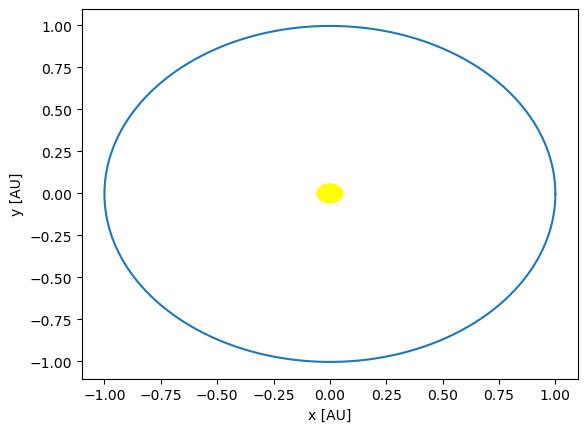

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
 
def EulerCromer( tmax, x0, y0, v0, u0, m, tau):
    # tmax: time for one orbit
    # x0 og y0: starting conditions for Earth's position
    # v0 og u0: starting conditions for Earth's speed
    # m: mass of Earth
    # tau: steplenght.
 
    N = int(round(tmax/tau))   #np.zeros(N) creates a list of just 0's of lenght N
    x = np.zeros(N)
    y = np.zeros(N)
    u = np.zeros(N)
    v = np.zeros(N)
    radiuser = np.zeros(N)
 
    # starting conditions
    u[0] = u0
    v[0] = v0
    x[0] = x0
    y[0] = y0
    radiuser[0] = np.sqrt((x[0]) ** 2 + (y[0]) ** 2)
 
    for n in range(1, N):
        u[n] = u[n - 1] - 4 * np.pi ** 2 * x[n - 1] * tau / (radiuser[n - 1] ** 3)
        v[n] = v[n - 1] - 4 * np.pi ** 2 * y[n - 1] * tau / (radiuser[n - 1] ** 3)
        x[n] = x[n - 1] + u[n] * tau
        y[n] = y[n - 1] + v[n] * tau
        radiuser[n] = np.sqrt((x[n]) ** 2 + (y[n]) ** 2)
 
 
    return x, y  #  Positions- and speed lists
 
# Start condtiotions::
x0 = 1    # Imagine the Sun is in origo, and the Earth starts at postion (1, 0)
y0 = 0
u0 = 0    # starting speed in x direction is 0
v0 = 2*3.1415623   # starting speed in y direction is 2*pi
m =  1 / 333480    # Mass of Earth relative to the Sun
tmax = 1           # Orbit time is one year
tau = 0.001        # small enough step length for the plotting
 
x1, y1 = EulerCromer(tmax, x0, y0, v0, u0, m, tau)
 
# The plot of the orbit.
plt.figure()
plt.plot(x1, y1)
circle = plt.Circle((0, 0), radius=0.06, fc='yellow')
plt.gca().add_patch(circle)
plt.xlabel(r'x [AU]')
plt.ylabel(r'y [AU]')
plt.show()